# Task 6.5 Unsupervised Machine Learning: kmeans clustering

## Script Table of Contents  

1. Import libraries and data sets  
2. Clean and preprocess the data frame for analysis
3. Employ elbow technique and select the number of clusters
4. Run the k-means algorithm and add results as a new column in the data frame  
5. Create scatterplot visualizations to view the results  
6. Calculate descriptive statistics for the clusters  
7. Propose next steps based on the clustering analysis

# 1. Import libraries and data sets

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans
import pylab as pl

In [2]:
# Ensures plots are displayed in the notebook
%matplotlib inline

In [3]:
path = r'/Users/brucehickling/Library/CloudStorage/Dropbox/Courses/CareerFoundry/Data Immersion/6_Advanced Analytics & Dashboard Design/Achievement Project/'

In [4]:
# Import the data sets
df = pd.read_csv(os.path.join(path, '2_Data', 'Prepared Data', 'HUD_gun_analysis.csv'))

In [5]:
df.head()

,FIPS Code,assisted_housing_count,active_finance,gun incident count,% of adults ≤ high school dip,avg unemploy rate 2015_2020,Area housing assistance category,Gun incident category
0,1001,1,0,40,11.5,4.250000,Few properties,Few gun incidents
1,1003,12,7,86,9.2,4.533333,Few properties,Few gun incidents
2,1005,3,1,21,26.8,6.533333,Few properties,Few gun incidents
3,1007,1,1,8,20.9,5.233333,Few properties,Few gun incidents
4,1009,2,0,21,19.5,4.216667,Few properties,Few gun incidents


In [6]:
df.shape

(2344, 8)

# 2. Clean and preprocess the data frame for analysis

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2344 entries, 0 to 2343
Data columns (total 8 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   FIPS Code                         2344 non-null   int64  
 1   assisted_housing_count            2344 non-null   int64  
 2   active_finance                    2344 non-null   int64  
 3   gun incident count                2344 non-null   int64  
 4   % of adults ≤ high school dip     2344 non-null   float64
 5   avg unemploy rate 2015_2020       2344 non-null   float64
 6   Area housing assistance category  2344 non-null   object 
 7   Gun incident category             2344 non-null   object 
dtypes: float64(2), int64(4), object(2)
memory usage: 146.6+ KB


In [8]:
# Remove categorical data
df.drop(columns=df.columns[6:], inplace = True)

In [9]:
# Rename column ''% of adults ≤ high school dip'
df.rename(columns={'% of adults ≤ high school dip': '% of adults < high school dip'}, inplace=True)

In [10]:
# Drop 'FIPS Code' column
df_cluster = df.drop(columns = 'FIPS Code')

In [11]:
df_cluster.head()

,assisted_housing_count,active_finance,gun incident count,% of adults < high school dip,avg unemploy rate 2015_2020
0,1,0,40,11.5,4.250000
1,12,7,86,9.2,4.533333
2,3,1,21,26.8,6.533333
3,1,1,8,20.9,5.233333
4,2,0,21,19.5,4.216667


# 3. Employ elbow technique and select the number of clusters

In [12]:
# Define the range of potential clusters
num_cl = range(1, 10)

# Define k-means clusters in the assigned range
kmeans = [KMeans(n_clusters=i) for i in num_cl]

In [13]:
# Create a cluster variation score for each cluster option
score = [kmeans[i].fit(df_cluster).score(df_cluster) for i in range(len(kmeans))]

In [14]:
score

[-307384782.0696223,
 -163262010.8340561,
 -58246038.24705617,
 -27525693.49837429,
 -15717474.34112101,
 -9712917.707213473,
 -7129231.948106566,
 -4889394.660855627,
 -3970901.5746041]

<function matplotlib.pyplot.show(close=None, block=None)>

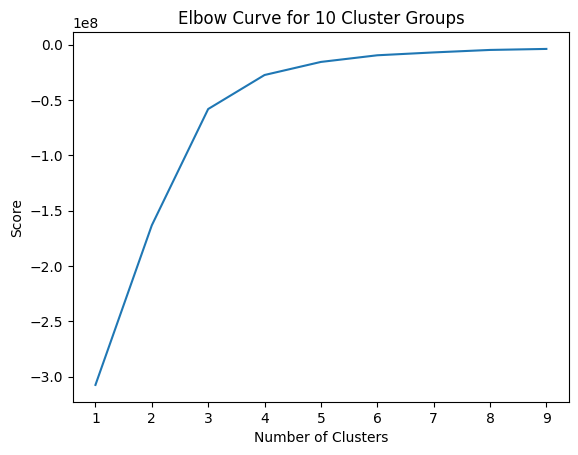

In [15]:
# Using PyLab, plot the elbow curve
pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve for 10 Cluster Groups')
pl.show

__I interpret from the elbow curve that 3 clusters is the most efficient number for this analysis__

# 4. Run the k-means algorithm and add results as a new column in the data frame

In [16]:
# Create the k-means object
kmeans = KMeans(n_clusters = 3)

In [17]:
# Fit the k-means object to the data set
kmeans.fit(df_cluster)

KMeans(n_clusters=3)

In [18]:
# Create a column of the k-means results and add it to the dataframe
df_cluster['clusters'] = kmeans.fit_predict(df_cluster)

In [19]:
# Check the revised dataframe
df_cluster.head()

,assisted_housing_count,active_finance,gun incident count,% of adults < high school dip,avg unemploy rate 2015_2020,clusters
0,1,0,40,11.5,4.250000,0
1,12,7,86,9.2,4.533333,0
2,3,1,21,26.8,6.533333,0
3,1,1,8,20.9,5.233333,0
4,2,0,21,19.5,4.216667,0


In [20]:
# Count the number of data points per cluster
df_cluster['clusters'].value_counts()

clusters
0    2257
1      86
2       1
Name: count, dtype: int64

# 5. Create scatterplot visualizations to view the results

## 5.1 'assisted housing count' and 'gun incident count' variables

<function matplotlib.pyplot.show(close=None, block=None)>

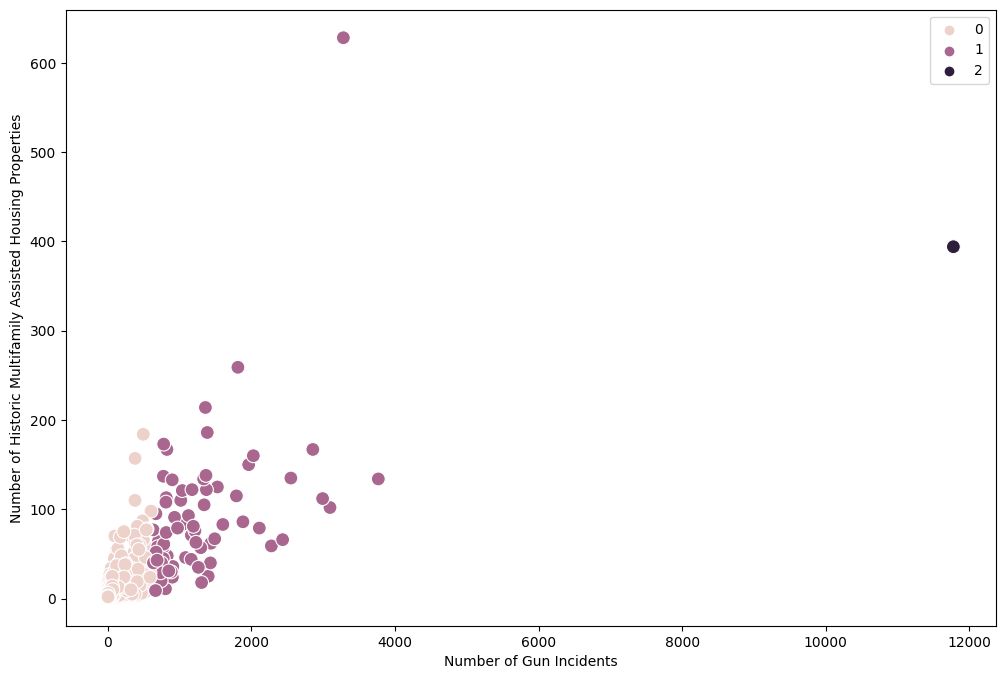

In [21]:
# Plot the clusters for the 'assisted_housing_count' and 'gun incident count' variables
plt.figure(figsize = (12,8))
ax = sns.scatterplot(x = df_cluster['gun incident count'], y = df_cluster['assisted_housing_count'], hue = kmeans.labels_, s = 100)
ax.grid(False)
plt.xlabel('Number of Gun Incidents')
plt.ylabel('Number of Historic Multifamily Assisted Housing Properties')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

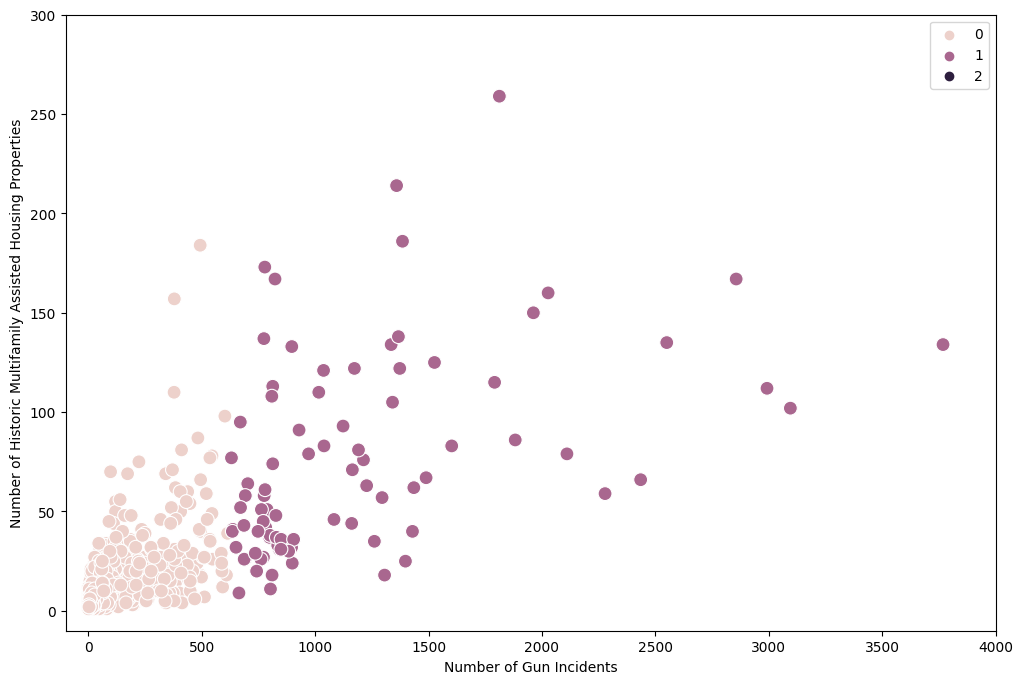

In [22]:
# Repeat the same plot, but limiting the x-axis to values <4000 and the y-axis to values <300
plt.figure(figsize = (12,8))
ax = sns.scatterplot(x = df_cluster['gun incident count'], y = df_cluster['assisted_housing_count'], hue = kmeans.labels_, s = 100)
ax.grid(False)
plt.xlabel('Number of Gun Incidents')
plt.ylabel('Number of Historic Multifamily Assisted Housing Properties')
plt.xlim(-100,4000)
plt.ylim(-10,300)
plt.show

In [23]:
# Export plot
plt_kmeans1 = plt
plt_kmeans1.savefig('kmeans1.png')

<Figure size 640x480 with 0 Axes>

In [24]:
cwd = os.getcwd()
cwd

'/Users/brucehickling/Library/CloudStorage/Dropbox/Courses/CareerFoundry/Data Immersion/6_Advanced Analytics & Dashboard Design/Achievement Project/3 Scripts'

<function matplotlib.pyplot.show(close=None, block=None)>

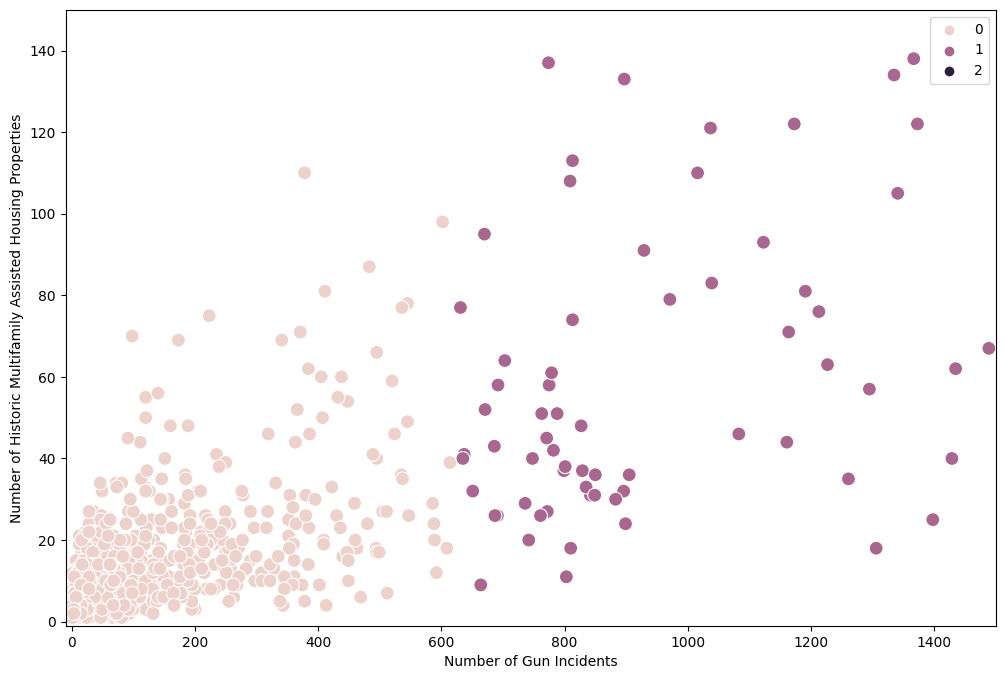

In [25]:
# Repeat the same plot, but limiting the x-axis to values <1500 and the y-axis to values <150
plt.figure(figsize = (12,8))
ax = sns.scatterplot(x = df_cluster['gun incident count'], y = df_cluster['assisted_housing_count'], hue = kmeans.labels_, s = 100)
ax.grid(False)
plt.xlabel('Number of Gun Incidents')
plt.ylabel('Number of Historic Multifamily Assisted Housing Properties')
plt.xlim(-10,1500)
plt.ylim(-1,150)
plt.show

__While an agressive treatment of extreme values was needed for the analysis up to this point, given the extreme values in both the assisted housing and gun violence variables, the removal of extreme values does impact a clustering analysis using the K-means method. The third cluster (2 - dark purple) consists of only one data point, the most extreme value for gun violence by several factors that comes from Cook County (Chicago).__  

__A moderate reduction in extreme values (y ≤ 300 and x ≤ 4000) dropped the third cluster (single data point) but otherwise did not impact the sample and provides the best K-means clustering result. A more forcefull reduction of extreme values (y≤ 50 and x ≤ 600) eliminates all of the first cluster (0 - pink) entirely and renders the cluster results ineffective. This shows the impact of extreme value reduction.__

__This result provides three clusters of counties that could be investigated for other factors that might contribute to rates of gun violence. Although I will use the reduction of extreme values that will remove the third cluster - given it is just one data point for a county/ area that is known to have a very high level of gun violence and high numbers of multifamily assisted housing, it won't significantly affect the analysis and it provides an opportunity to explore the features of this county that make it unique from all others in the US for its very high rates of gun violence.__

## 5.2 'active_finance' and 'gun incident count'

<function matplotlib.pyplot.show(close=None, block=None)>

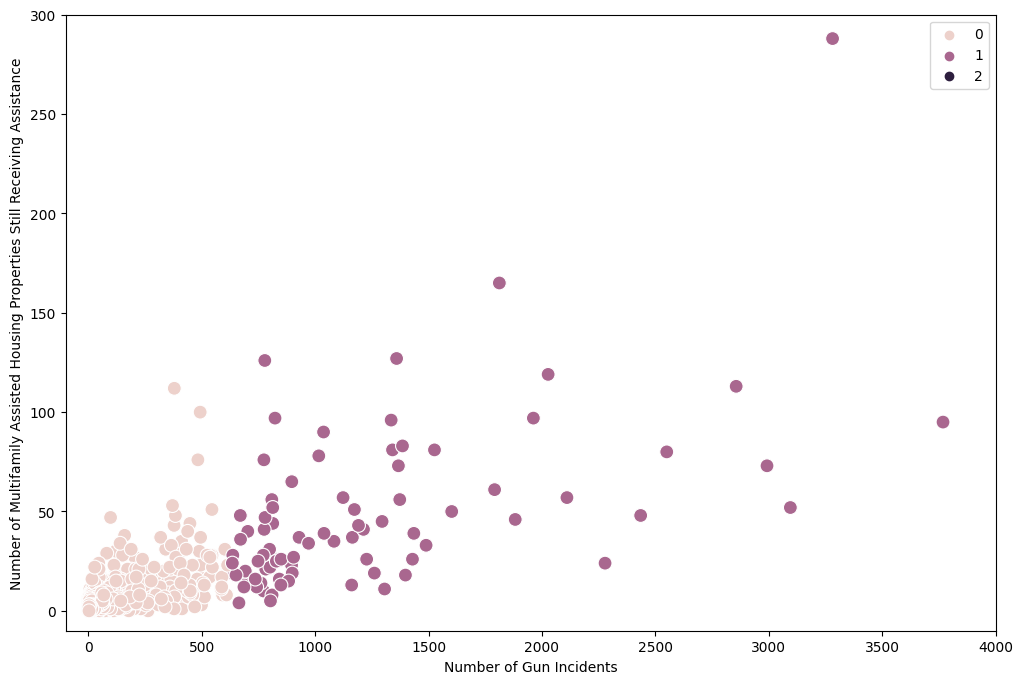

In [26]:
# Plot the clusters for 'active_finace' and 'gun incident count' variables
plt.figure(figsize = (12,8))
ax = sns.scatterplot(x = df_cluster['gun incident count'], y = df_cluster['active_finance'], hue = kmeans.labels_, s = 100)
ax.grid(False)
plt.xlabel('Number of Gun Incidents')
plt.ylabel('Number of Multifamily Assisted Housing Properties Still Receiving Assistance')
plt.xlim(-100,4000)
plt.ylim(-10,300)
plt.show

## 5.3 '% of adults without a high school diploma' and 'gun incident count' variables

<function matplotlib.pyplot.show(close=None, block=None)>

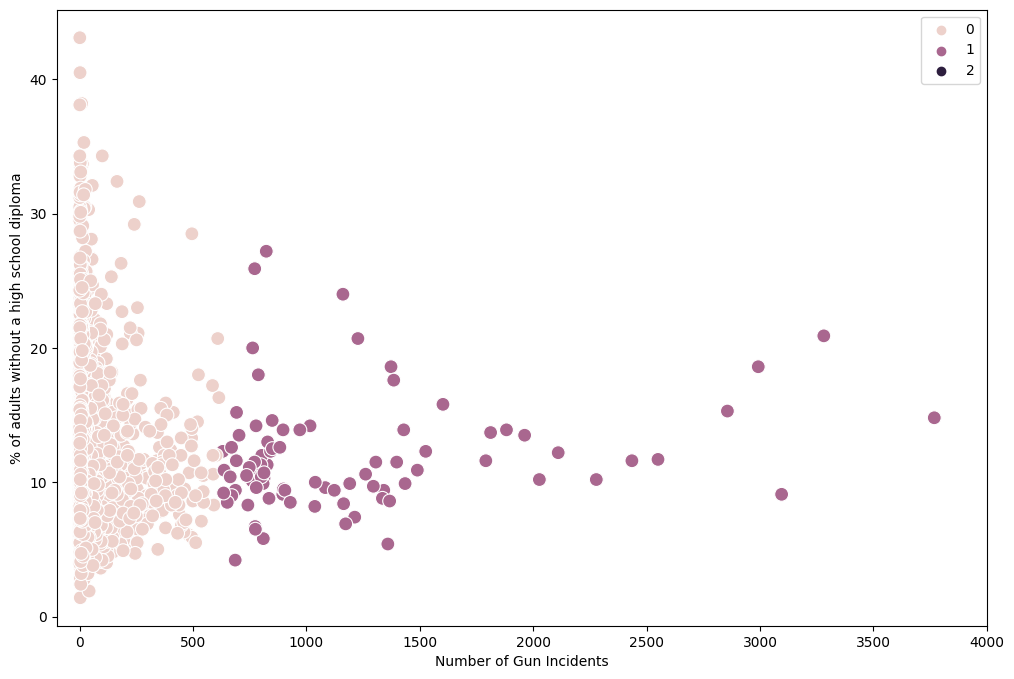

In [27]:
# Plot the clusters for the '% of adults < high school dip' and 'gun incident count' variables
plt.figure(figsize = (12,8))
ax = sns.scatterplot(x = df_cluster['gun incident count'], y = df_cluster['% of adults < high school dip'], hue = kmeans.labels_, s = 100)
ax.grid(False)
plt.xlabel('Number of Gun Incidents')
plt.ylabel('% of adults without a high school diploma')
plt.xlim(-100,4000)
plt.show

__Again, with stricter treatment of outliers, some trends between the three cluster emerge - if still weak. The pink cluster has areas with a higher percentages of adults without high school diplomans and lower incidents of gun violence than areas in the dark purple cluster that have higher incidents of gun violence with lower percentages of adults without high school diplomas overall - both with notable extreme values still present.__

## 5.4 'average unemployment rate 2015-2020' and 'gun incident count' variables

<function matplotlib.pyplot.show(close=None, block=None)>

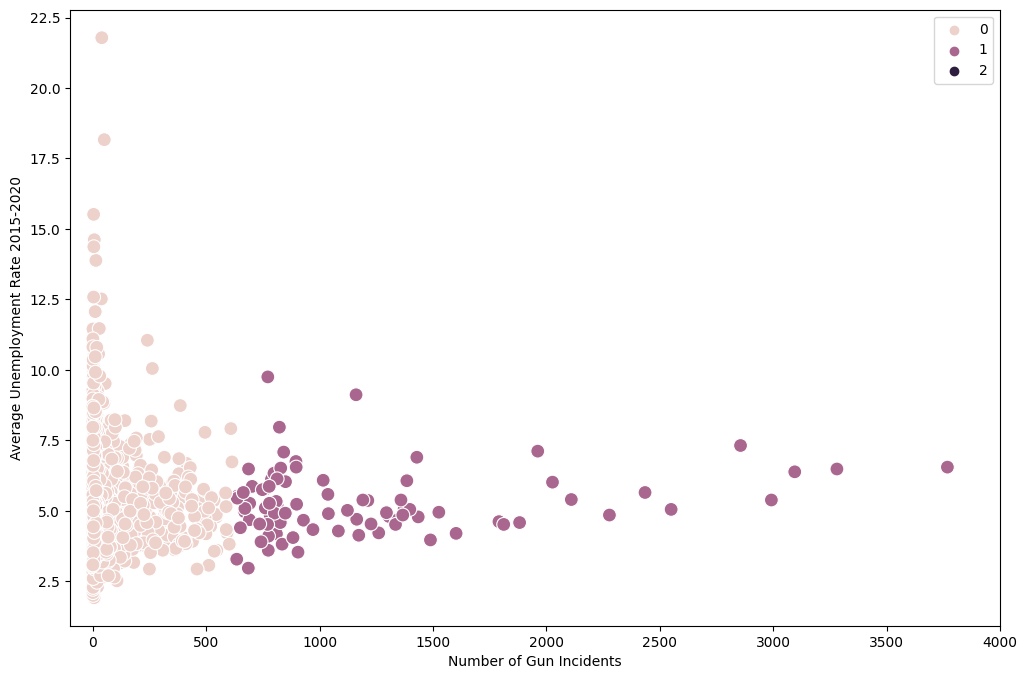

In [28]:
# Plot the clusters for the 'avg unemploy rate 2015_2020' and 'gun incident count' variables
plt.figure(figsize = (12,8))
ax = sns.scatterplot(x = df_cluster['gun incident count'], y = df_cluster['avg unemploy rate 2015_2020'], hue = kmeans.labels_, s = 100)
ax.grid(False)
plt.xlabel('Number of Gun Incidents')
plt.ylabel('Average Unemployment Rate 2015-2020')
plt.xlim(-100,4000)
plt.show

__The purple cluster also has counties with higher numbers of gun incidents for the same levels of unemployment as the pink cluster, so there are other factors other than unemployment alone that influence the number of gun incidents.__

## 5.5 Housing assistance, historical and active, and unemployment

<function matplotlib.pyplot.show(close=None, block=None)>

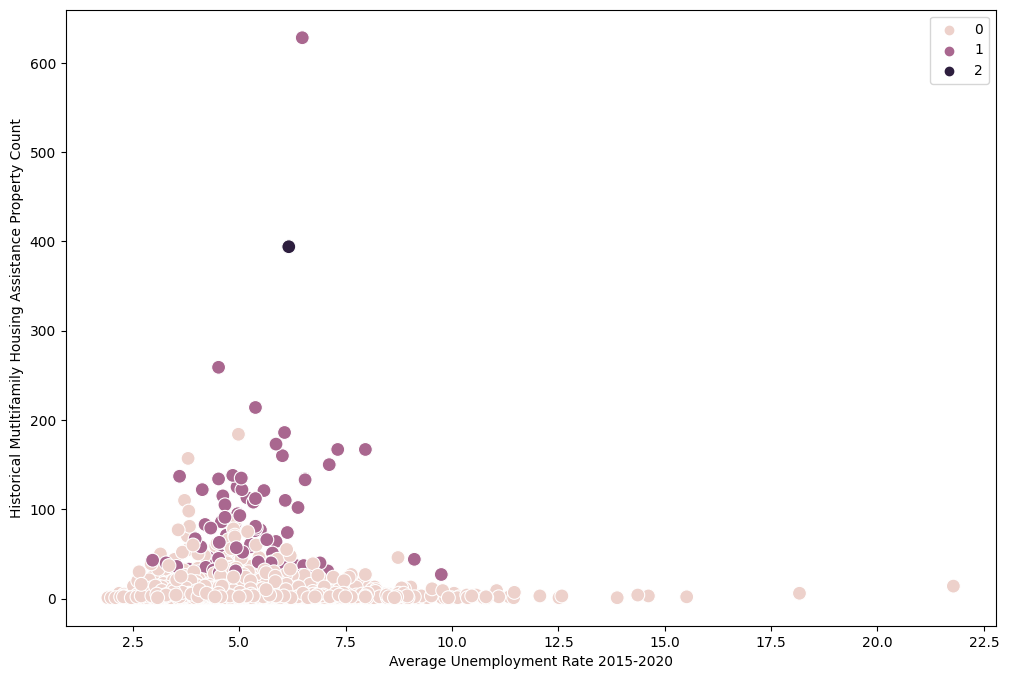

In [29]:
# Plot the clusters for the 'housing assistance count' and 'avg unemploy rate 2015_2020' variables
plt.figure(figsize = (12,8))
ax = sns.scatterplot(x = df_cluster['avg unemploy rate 2015_2020'], y = df_cluster['assisted_housing_count'], hue = kmeans.labels_, s = 100)
ax.grid(False)
plt.xlabel('Average Unemployment Rate 2015-2020')
plt.ylabel('Historical Mutltifamily Housing Assistance Property Count')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

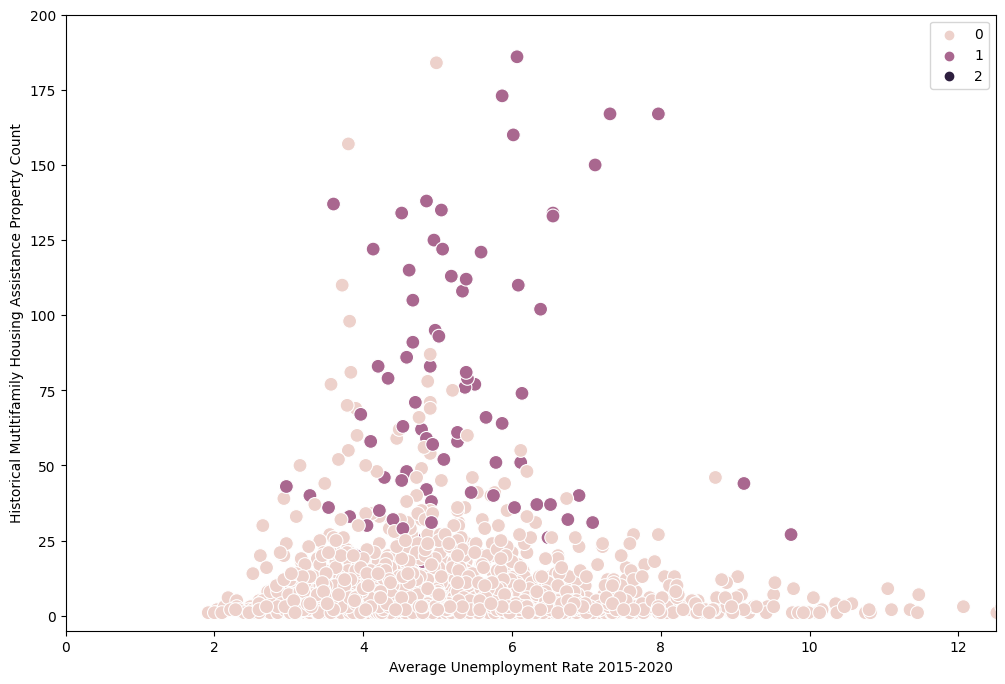

In [30]:
# Plot the clusters for the 'housing assistance count' and 'avg unemploy rate 2015_2020' variables with extreme values cut-off
plt.figure(figsize = (12,8))
ax = sns.scatterplot(x = df_cluster['avg unemploy rate 2015_2020'], y = df_cluster['assisted_housing_count'], hue = kmeans.labels_, s = 100)
ax.grid(False)
plt.xlabel('Average Unemployment Rate 2015-2020')
plt.ylabel('Historical Mutltifamily Housing Assistance Property Count')
plt.ylim(-5,200)
plt.xlim(0, 12.5)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

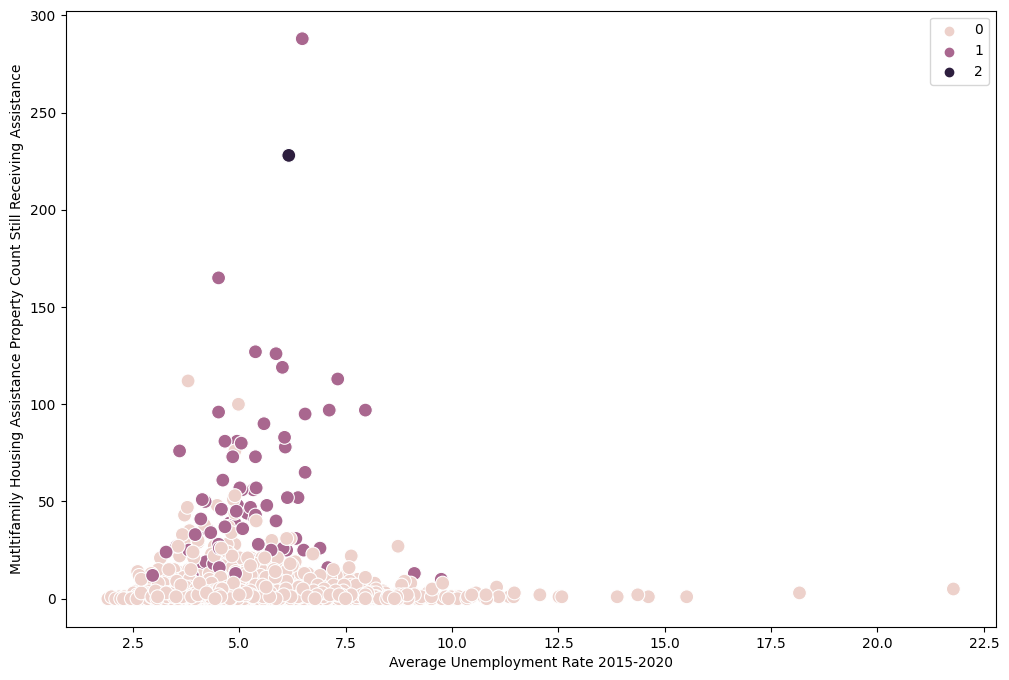

In [31]:
# Plot the clusters for the 'active_fianance' and 'avg unemploy rate 2015_2020' variables
plt.figure(figsize = (12,8))
ax = sns.scatterplot(x = df_cluster['avg unemploy rate 2015_2020'], y = df_cluster['active_finance'], hue = kmeans.labels_, s = 100)
ax.grid(False)
plt.xlabel('Average Unemployment Rate 2015-2020')
plt.ylabel('Mutltifamily Housing Assistance Property Count Still Receiving Assistance')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

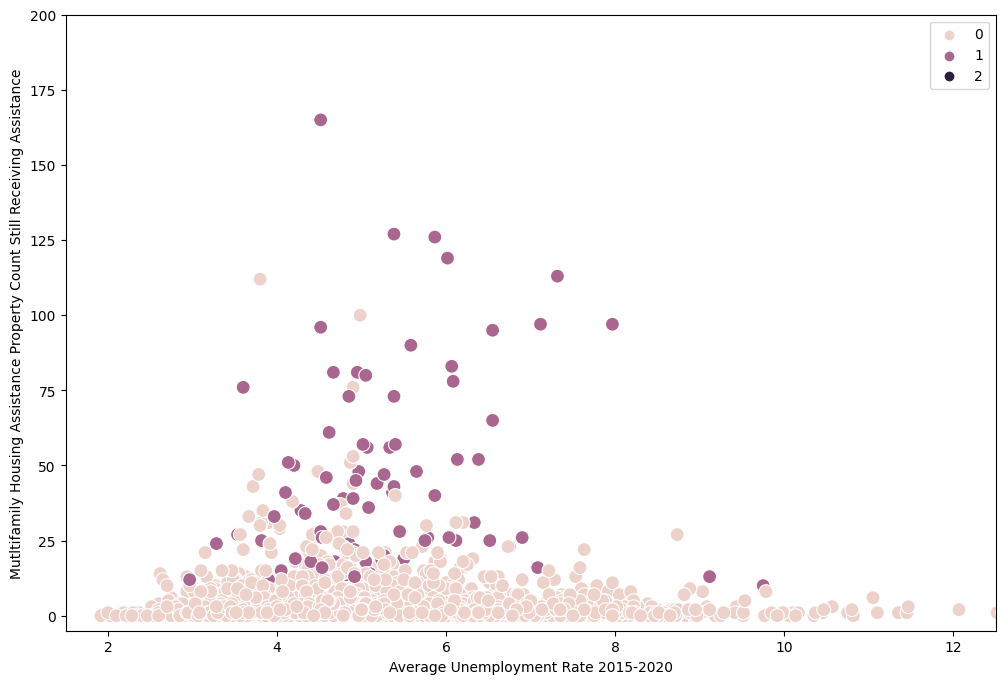

In [32]:
# Plot the clusters for the 'active_fianance' and 'avg unemploy rate 2015_2020' variables
plt.figure(figsize = (12,8))
ax = sns.scatterplot(x = df_cluster['avg unemploy rate 2015_2020'], y = df_cluster['active_finance'], hue = kmeans.labels_, s = 100)
ax.grid(False)
plt.xlabel('Average Unemployment Rate 2015-2020')
plt.ylabel('Mutltifamily Housing Assistance Property Count Still Receiving Assistance')
plt.ylim(-5,200)
plt.xlim(1.5, 12.5)
plt.show

# 6. Calculate descriptive statistics for the clusters

In [33]:
# Create labels for the three clusters
df_cluster.loc[df_cluster['clusters'] == 0, 'cluster'] = 'red'
df_cluster.loc[df_cluster['clusters'] == 1, 'cluster'] = 'white'
df_cluster.loc[df_cluster['clusters'] == 2, 'cluster'] = 'black'

In [34]:
# Calculate summary statistics for the data set variables grouping by cluster label
df_cluster.groupby('cluster').agg({'assisted_housing_count': ['mean', 'median'], 'active_finance': ['mean', 'median'], 'gun incident count': ['mean', 'median'], '% of adults < high school dip': ['mean', 'median'], 'avg unemploy rate 2015_2020': ['mean', 'median']})

assisted_housing_count        active_finance          
                          mean median           mean median   
cluster                                                       
black               394.000000  394.0     228.000000  228.0  \
red                   6.914931    4.0       3.646433    2.0   
white                82.593023   62.5      47.430233   36.5   

        gun incident count          % of adults < high school dip          
                      mean   median                          mean median   
cluster                                                                    
black         11780.000000  11780.0                     12.900000  12.90  \
red              48.381037     12.0                     12.910013  11.70   
white          1209.732558    902.0                     11.950000  11.05   

        avg unemploy rate 2015_2020            
                               mean    median  
cluster                                        
black                      6.166667  6.166667  
red                        5.155450  4.916667  
white                      5.309109  5.075000

# 7. Propose next steps based on the clustering analysis

__The first step is to go back to the data set preparation and a closer look of statistical analysis for extreme value identification and a more efficient treatment to see if clearer trends are visible from cluster analysis using k-means.__  

__Secondly, using the results of the cluster analysis discussed above, I would propose using the clusters identified to see if the clusters can be labeled by looking at characteristics of the counties under each - paying particular attention to the pink and purple clusters - to see if other factors such as urban mega city/ urban smaller city, type of industry (manufacturing, farming, etc.), location (coastal vs inland), etc are commom within the clusters for further investigation.__  

__One area I would be intersted to explore more is the impact of active housing assistance on areas vs those that have properties that did receive housing assistance but don't any longer and the impacts on gun violence, education, and unemployment to see if there are significant trends or insights.__  

__Lastly, Cook County should be studied and compared with counties in the other counties to understand why the levels of gun violence are so much higher as compared to all other factors already looked at within this study.__  

__Other factors around multifamily housing assistance can be explored to look at the corrleation with gun crimes, which could provide interesting insights.__

In [35]:
# Merge df_cluster to df to add 'FIPS Code' column back to the data set before exporting
df = df.merge(df_cluster, on = ['assisted_housing_count', 'active_finance', 'gun incident count', '% of adults < high school dip', 'avg unemploy rate 2015_2020'])

In [36]:
df.head()

,FIPS Code,assisted_housing_count,active_finance,gun incident count,% of adults < high school dip,avg unemploy rate 2015_2020,clusters,cluster
0,1001,1,0,40,11.5,4.250000,0,red
1,1003,12,7,86,9.2,4.533333,0,red
2,1005,3,1,21,26.8,6.533333,0,red
3,1007,1,1,8,20.9,5.233333,0,red
4,1009,2,0,21,19.5,4.216667,0,red


In [37]:
# Export dataframe with the 'cluster' column to import into tableau
df.to_csv(os.path.join(path, '2_Data', 'Storyboard', 'kmeans_cluster.csv'))